# Análisis de ventas de una máquina de café
1. **Resumen del proyecto** \
El objetivo de este proyecto es realizar un análisis de las ventas de una máquina de café ubicada en un shopping de Vinnytsia, Ucrania para identificar patrones, evaluar el rendimiento de los productos y entender el comportamiento de los clientes. Este análisis se basará en un conjunto de datos que incluye información sobre la fecha de la transacción, el método de pago, el precio y el nombre del café vendido. Los hallazgos proporcionarán información estratégica para optimizar las operaciones y aumentar la rentabilidad.

2. **Preguntas de negocio para el análisis** \
A continuación, se presenta una lista de las preguntas de negocio que se abordarán en este análisis. Cada una de ellas servirá como guía para la exploración de los datos y la extracción de conclusiones relevantes.

**Rendimiento temporal** \
Ventas totales: ¿Cuál ha sido la evolución de las ventas totales a lo largo del período de tiempo cubierto por los datos? ¿Se observa una tendencia de crecimiento, estabilidad o disminución?

Patrones de venta diarios: ¿Existen patrones de ventas recurrentes por día de la semana? ¿El volumen de ventas es mayor en días específicos, como fines de semana o días laborales?

**Comportamiento del cliente**
Métodos de pago: ¿Cuál es el método de pago más utilizado por los clientes (efectivo o tarjeta)?

Relación entre precio y pago: ¿Existe alguna correlación entre el tipo de pago y el valor de la transacción? Por ejemplo, ¿las compras de mayor precio se asocian a un método de pago en particular?

**Rendimiento de productos**
Productos más vendidos: ¿Cuál es el producto más popular en términos de unidades vendidas?

Productos más rentables: ¿Qué productos generan la mayor cantidad de ingresos?

Análisis comparativo: ¿Existe una diferencia significativa entre el café más vendido y el más rentable?

**Relaciones entre variables**
Impacto de la hora/día: ¿Qué tipo de café se vende con mayor frecuencia en los picos de ventas diarios o semanales?

Preferencias de pago: ¿En qué días de la semana el uso de efectivo (cash_type) es más predominante?

### Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

### Importción de datasets

In [2]:
# Rutas de los datasets
path1 = 'C:/Users/btole/Desktop/Pandas Udemy/Proyectos/Datasets/Coffee_sales_1.csv'
path2 = 'C:/Users/btole/Desktop/Pandas Udemy/Proyectos/Datasets/Coffee_sales_2.csv'

In [3]:
# Cargamos dataframe 1
df1 = pd.read_csv(path1)
df1.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
# Cargamos dataframe 2
df2 = pd.read_csv(path2)
df2.head()

,date,datetime,cash_type,money,coffee_name
0,2025-02-08,2025-02-08 14:26:04,cash,15.0,Tea
1,2025-02-08,2025-02-08 14:28:26,cash,15.0,Tea
2,2025-02-08,2025-02-08 14:33:04,card,20.0,Espresso
3,2025-02-08,2025-02-08 15:51:04,card,30.0,Chocolate with coffee
4,2025-02-08,2025-02-08 16:35:01,cash,27.0,Chocolate with milk


### Combinamos los dataframes en uno

In [5]:
df = pd.concat([df1, df2], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3898 non-null   object 
 1   datetime     3898 non-null   object 
 2   cash_type    3898 non-null   object 
 3   card         3547 non-null   object 
 4   money        3898 non-null   float64
 5   coffee_name  3898 non-null   object 
dtypes: float64(1), object(5)
memory usage: 182.8+ KB


### Limpieza del dataframe

In [6]:
# Eliminamos las columnas datetime y card
df = df.drop(columns=['card'])
df.head()

,date,datetime,cash_type,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte


In [7]:
# Corrección de tipo de datos
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed', errors='coerce')
# Agregamos las columnas de mes y año
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
# Modificamos el orden de las columnas
new_order = ['year', 'month', 'date', 'datetime', 'cash_type', 'money',	'coffee_name']
df = df[new_order]
df.head()

,year,month,date,datetime,cash_type,money,coffee_name
0,2024,3,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte
1,2024,3,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate
2,2024,3,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate
3,2024,3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano
4,2024,3,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte


In [8]:
# Corregimos el nombre de uno de los productos
df['coffee_name'] = df['coffee_name'].replace('Americano with Milk', 'Americano with milk')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   year         3898 non-null   int32         
 1   month        3898 non-null   int32         
 2   date         3898 non-null   datetime64[ns]
 3   datetime     3898 non-null   datetime64[ns]
 4   cash_type    3898 non-null   object        
 5   money        3898 non-null   float64       
 6   coffee_name  3898 non-null   object        
dtypes: datetime64[ns](2), float64(1), int32(2), object(2)
memory usage: 182.8+ KB


## Análisis Exploratorio de Datos (EDA)

### **Rendimiento temporal** 
##### **Ventas totales:** 
¿Cuál ha sido la evolución de las ventas totales a lo largo del período de tiempo cubierto por los datos? ¿Se observa una tendencia de crecimiento, estabilidad o disminución?



In [10]:
# Ventas totales en un periodo de 12 meses
ventas_totales = df['money'].sum().round()
df_ventas_totales = pd.DataFrame([ventas_totales], columns=['Total de Ventas'], index=['Ingresos'])

# Mostramos las ventas totales con formato de moneda
df_ventas_totales['Total de Ventas'] = df_ventas_totales['Total de Ventas'].apply(lambda x: f'${x:,.2f}')
df_ventas_totales

,Total de Ventas
Ingresos,"$122,322.00"


In [11]:
# Ventas totales por mes
ventas_totales_mes = df.groupby(['year', 'month'])['money'].sum().to_frame()

# Lo almacenamos en un df para poder graficar
df_ventas_totales_mes = ventas_totales_mes.reset_index()

# Mostramos las ventas totales por mes con formato de moneda
ventas_totales_mes['money'] = ventas_totales_mes['money'].apply(lambda x: f'${x:,.2f}')
ventas_totales_mes

money
year month            
2024 3       $7,050.20
     4       $6,720.56
     5       $9,063.42
     6       $7,758.76
     7       $6,915.94
     8       $7,613.84
     9       $9,988.64
     10     $13,891.16
     11      $8,590.54
     12      $8,237.74
2025 1       $6,398.86
     2      $16,804.48
     3      $13,287.44

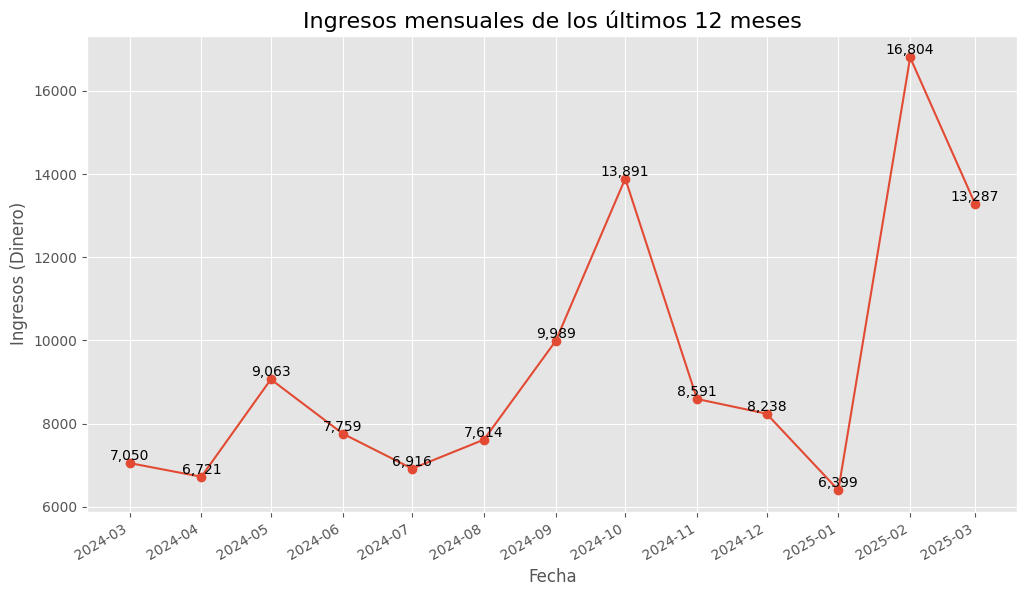

In [24]:
# Crea una columna de fecha para un eje x más claro
df_ventas_totales_mes['date'] = pd.to_datetime(df_ventas_totales_mes['year'].astype(str) + '-' + df_ventas_totales_mes['month'].astype(str))

# Crea la figura y el gráfico
plt.figure(figsize=(12, 7)) # Aumenta el tamaño para mejor visualización
plt.plot(df_ventas_totales_mes['date'], df_ventas_totales_mes['money'], marker='o', )

# Muestra todos los meses en el eje X
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

# Añade los valores de 'money' en cada punto del gráfico
for x, y in zip(df_ventas_totales_mes['date'], df_ventas_totales_mes['money']):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=10)

# Personaliza el gráfico
plt.title('Ingresos mensuales de los últimos 12 meses', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ingresos (Dinero)', fontsize=12)
plt.grid(True)
plt.style.use('ggplot')
plt.show()

##### **Patrones de venta diarios:** 
¿Existen patrones de ventas recurrentes por día de la semana? ¿El volumen de ventas es mayor en días específicos, como fines de semana o días laborales?



In [13]:
# 1. Cantidad de ventas por día de la semana.
date_sales = df['date'].dt.day_name().value_counts()

# 2. Convierte la Serie en un DataFrame y reinicia el índice.
# El método reset_index() crea las columnas 'index' y 'date'.
df_date_sales = date_sales.reset_index()

# 3. Nombra las columnas para mayor claridad.
df_date_sales.columns = ['Day', 'Sales']

# 4. Crea una lista con el orden correcto de los días.
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 5. Convierte la columna 'Day' a un tipo de dato categórico y ordena.
df_date_sales['Day'] = pd.Categorical(df_date_sales['Day'], categories=dias_orden, ordered=True)
df_date_sales = df_date_sales.sort_values('Day')

# 6. Reinicia el índice final para que esté ordenado.
df_date_sales = df_date_sales.reset_index(drop=True)

df_date_sales

,Day,Sales
0,Monday,591
1,Tuesday,604
2,Wednesday,553
3,Thursday,540
4,Friday,586
5,Saturday,531
6,Sunday,493


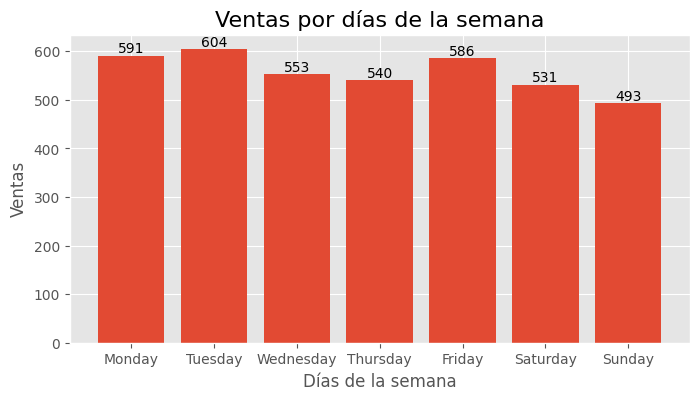

In [14]:
# Crea la figura y el gráfico
plt.figure(figsize=(8, 4)) # Aumenta el tamaño para mejor visualización
plt.bar(df_date_sales['Day'], df_date_sales['Sales'])

# Añade los valores de 'money' en cada punto del gráfico
for x, y in zip(df_date_sales['Day'], df_date_sales['Sales']):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=10)

# Personaliza el gráfico
plt.title('Ventas por días de la semana', fontsize=16)
plt.xlabel('Días de la semana', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.style.use('ggplot')
plt.show()

### **Comportamiento del cliente**
##### **Métodos de pago:** 
¿Cuál es el método de pago más utilizado por los clientes (efectivo o tarjeta)?


In [15]:
df_cash_type = df['cash_type'].value_counts().to_frame()
df_cash_type.reset_index(inplace=True)
df_cash_type

,cash_type,count
0,card,3729
1,cash,169


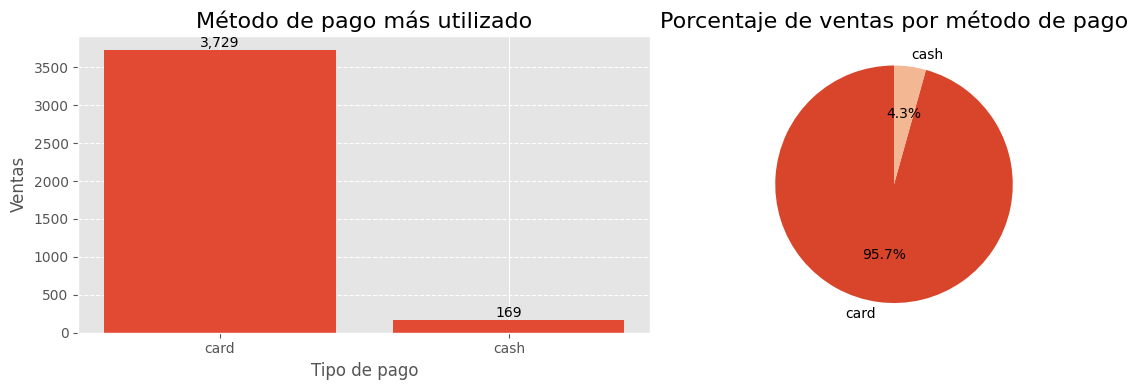

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(df_cash_type['cash_type'], df_cash_type['count'])
for x, y in zip(df_cash_type['cash_type'], df_cash_type['count']):
    ax1.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=10)
ax1.set_title('Método de pago más utilizado', fontsize=16)
ax1.set_xlabel('Tipo de pago', fontsize=12)
ax1.set_ylabel('Ventas', fontsize=12)
ax1.grid(axis='y', linestyle='--')

percentages = df_cash_type['count'] / df_cash_type['count'].sum() * 100
ax2.pie(df_cash_type['count'], labels=df_cash_type['cash_type'], autopct='%.1f%%', startangle=90, colors=["#d8452b","#f3b794"])
ax2.set_title('Porcentaje de ventas por método de pago', fontsize=16)

plt.tight_layout()
plt.style.use('ggplot')
plt.show()

##### **Relación entre precio y pago:** 
¿Existe alguna correlación entre el tipo de pago y el valor de la transacción? Por ejemplo, ¿las compras de mayor precio se asocian a un método de pago en particular?

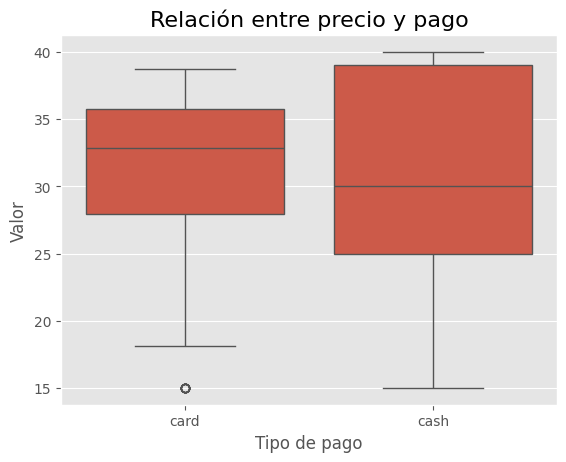

In [17]:
sns.boxplot(x='cash_type', y='money', data=df)
# Personaliza el gráfico
plt.title('Relación entre precio y pago', fontsize=16)
plt.xlabel('Tipo de pago', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.style.use('ggplot')
plt.show()

### **Rendimiento de productos**
##### **Productos más vendidos:** 
¿Cuál es el producto más popular en términos de unidades vendidas?


Productos más rentables: ¿Qué productos generan la mayor cantidad de ingresos?

Análisis comparativo: ¿Existe una diferencia significativa entre el café más vendido y el más rentable?

In [18]:
# Producto más vendido
df_top_sales_prod = df['coffee_name'].value_counts().reset_index()
df_top_sales_prod.sort_values(by='count', inplace=True)

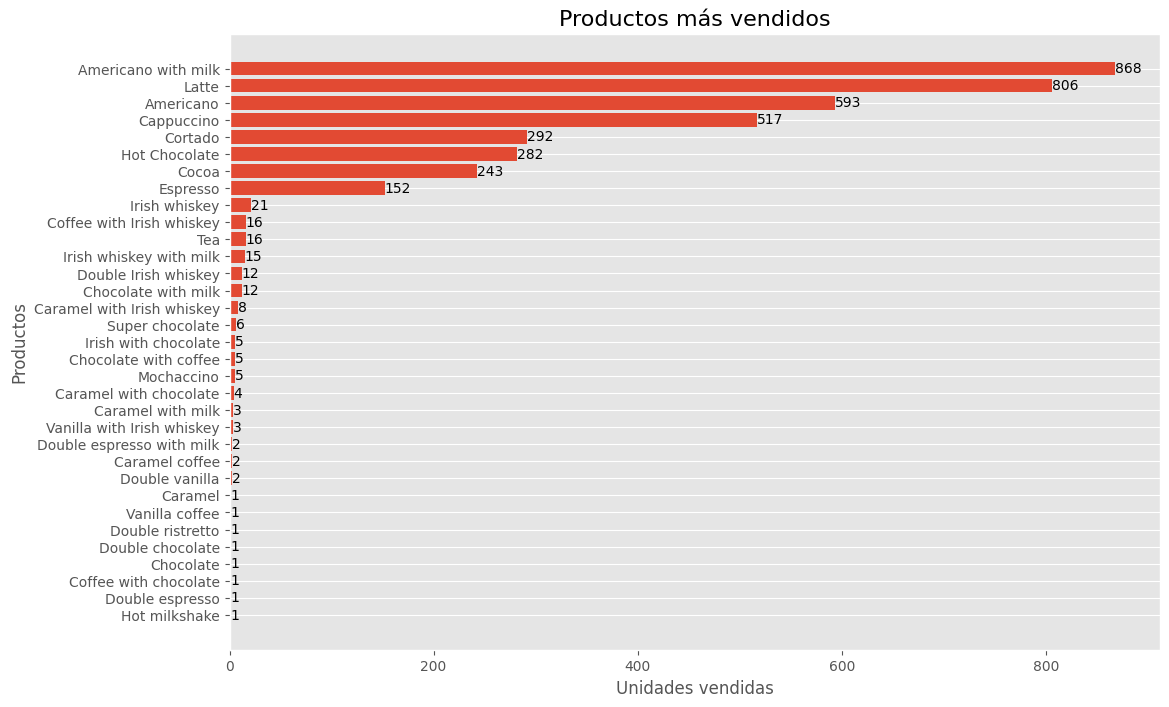

In [19]:
plt.figure(figsize=(12, 8))
plt.barh(df_top_sales_prod['coffee_name'], df_top_sales_prod['count'])

# Añade los valores de 'count' en cada barra
for y, x in enumerate(df_top_sales_prod['count']):
    plt.text(x, y, f'{x:,.0f}', va='center', ha='left', fontsize=10)

# Personaliza el gráfico
plt.title('Productos más vendidos', fontsize=16)
plt.xlabel('Unidades vendidas', fontsize=12) 
plt.ylabel('Productos', fontsize=12) 
plt.grid(axis='x') # La cuadrícula ahora es horizontal
plt.style.use('ggplot')
plt.show()

##### **Productos más rentables:** 
¿Qué productos generan la mayor cantidad de ingresos?


Análisis comparativo: ¿Existe una diferencia significativa entre el café más vendido y el más rentable?

In [20]:
df_top_profit_prod = df.groupby('coffee_name')['money'].sum().to_frame()
df_top_profit_prod.sort_values(by='money', ascending=False, inplace=True)
df_top_profit_prod.reset_index(inplace=True)

# Top 5 productos mas rentables
df_top_profit_prod.head()

,coffee_name,money
0,Latte,28658.30
1,Americano with milk,26369.12
2,Cappuccino,18514.14
3,Americano,15437.26
4,Hot Chocolate,10172.46


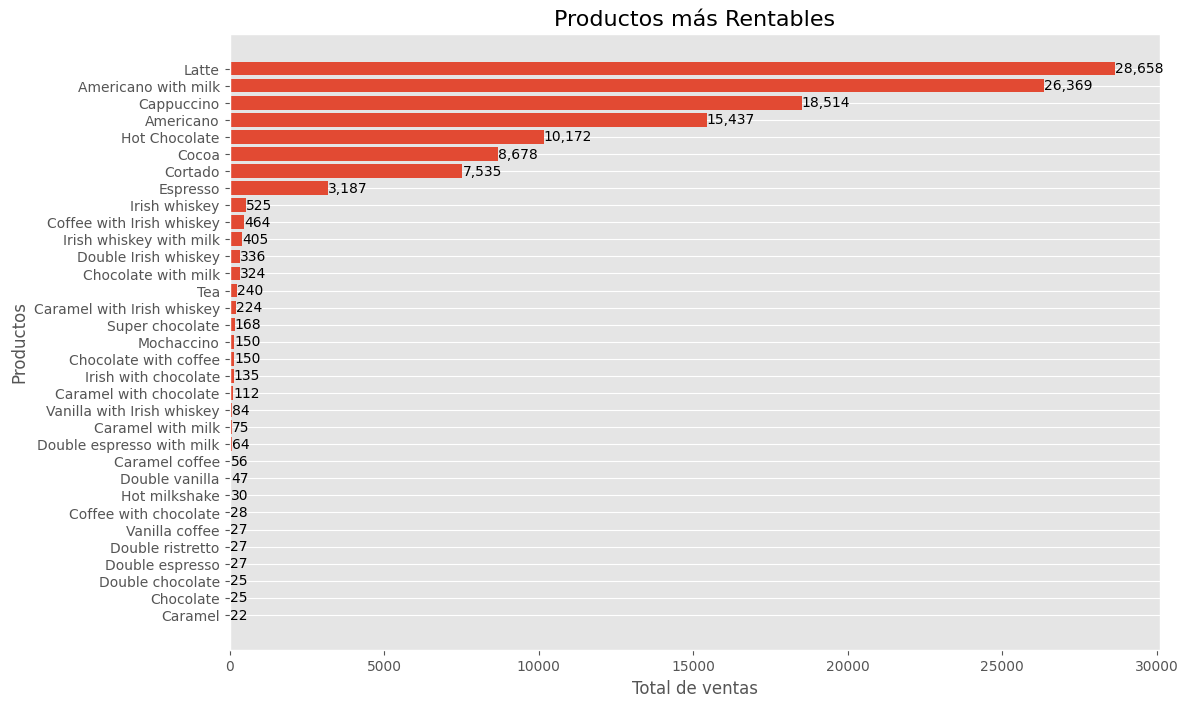

In [21]:
top_profit_sort = df_top_profit_prod.sort_values(by='money')
plt.figure(figsize=(12, 8))
plt.barh(top_profit_sort['coffee_name'], top_profit_sort['money'])

# Añade los valores de 'count' en cada barra
for y, x in enumerate(top_profit_sort['money']):
    plt.text(x, y, f'{x:,.0f}', va='center', ha='left', fontsize=10)

# Personaliza el gráfico
plt.title('Productos más Rentables', fontsize=16)
plt.xlabel('Total de ventas', fontsize=12) 
plt.ylabel('Productos', fontsize=12) 
plt.grid(axis='x') 
plt.style.use('ggplot')
plt.show()

##### **Análisis comparativo:** 
¿Existe una diferencia significativa entre el café más vendido y el más rentable?

In [22]:
# Creamos una tabla con el precio promedio de cada producto
table_prices_avg = df.groupby('coffee_name')['money'].mean().to_frame().round(2)
table_prices_avg.reset_index(inplace=True)

In [23]:
# Filtramos la tabla para quedarnos con el producto más vendido (Americano with milk) y con el producto más rentable (Latte)
table_prices_avg_top = table_prices_avg[table_prices_avg['coffee_name'].isin(['Americano with milk', 'Latte'])]
table_prices_avg_top

,coffee_name,money
1,Americano with milk,30.38
27,Latte,35.56


El café más vendido es el **Americano with milk** y el café más rentable es el **Latte**. Su diferencia principal es el precio de cada uno, si bien el café Americano with milk es el más vendido con una diferencia de 62 unidades, este no termina de alcanzar los beneficios de venta que alcanza el Latte por una diferencia de 2.289 Grivnas.



### **Relaciones entre variables**
##### **Impacto de la hora/día:** 
¿Qué tipo de café se vende con mayor frecuencia en los picos de ventas diarios o semanales?

Preferencias de pago: ¿En qué días de la semana el uso de efectivo (cash_type) es más predominante?



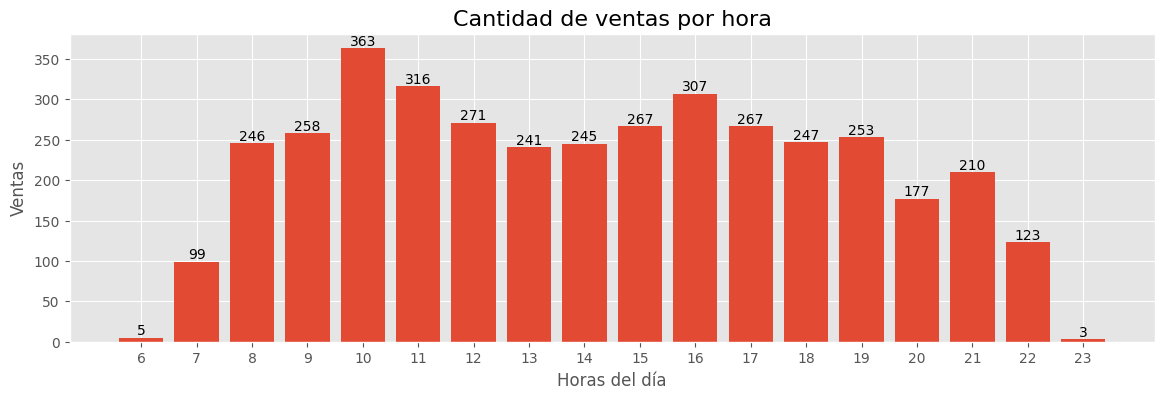

In [ ]:
# Creamos un df con la cantidad de ventas agrupadas en horas del día
sells_hour = df.groupby([df['datetime'].dt.hour])['coffee_name'].count().to_frame('total_sales')

plt.figure(figsize=(14, 4))
plt.bar(sells_hour.index, sells_hour['total_sales'])

for x, y in zip(sells_hour.index, sells_hour['total_sales']):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=10)

# Le pasamos al gráfico las etiquetas de las horas (de 0 a 23)
plt.xticks(sells_hour.index)

plt.title('Cantidad de ventas por hora', fontsize=16)
plt.xlabel('Horas del día', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.style.use('ggplot')
plt.show()

In [42]:
# Encuentra las horas con el mayor volumen de ventas
# Usamos idxmax() para encontrar el índice (la hora) con el valor máximo
daily_peak_hour = sells_hour['total_sales'].idxmax()

print(f"La hora pico de ventas es a las {daily_peak_hour}:00.")

La hora pico de ventas es a las 10:00.


In [32]:
# Filtra el DataFrame para incluir solo las ventas de la hora pico
df_peak = df[df['datetime'].dt.hour == daily_peak_hour]

# Agrupa por nombre de café y cuenta las ventas en esa hora
productos_en_pico = df_pico.groupby('coffee_name')['coffee_name'].count().to_frame('count').sort_values('count', ascending=False)

print("\nProductos más vendidos durante la hora pico:")
print(productos_en_pico)


Productos más vendidos durante la hora pico:
                         count
coffee_name                   
Americano with milk        108
Latte                       81
Americano                   61
Cortado                     34
Cappuccino                  30
Hot Chocolate               21
Espresso                    13
Cocoa                        8
Irish whiskey                2
Chocolate with coffee        1
Chocolate with milk          1
Double espresso              1
Irish whiskey with milk      1
Irish with chocolate         1


##### **Preferencias de pago:** 
¿En qué días de la semana el uso de efectivo (cash_type) es más predominante?

In [85]:
# Creamos un df con solo las columnas date y cash_type
cash_type_sales = df[['date', 'cash_type']]
# Agregamos el nombre de los días
cash_type_sales['day'] = cash_type_sales['date'].dt.day_name()
# Eliminamos la columna date
cash_type_sales = cash_type_sales.drop(columns='date')

# Agrupamos en un nuevo df la cantidad de ventas según día y metódo de pago
df_cash_type_sales = cash_type_sales.groupby(['day', 'cash_type'])['cash_type'].count().to_frame('count')
# Reseteamos el index 
df_cash_type_sales.reset_index(inplace=True)

#  Convierte la columna 'Day' a un tipo de dato categórico y ordena.
df_cash_type_sales['day'] = pd.Categorical(df_cash_type_sales['day'], categories=dias_orden, ordered=True)
df_cash_type_sales = df_cash_type_sales.sort_values('day')

# Reinicia el índice final para que esté ordenado.
df_cash_type_sales = df_cash_type_sales.reset_index(drop=True)

# Reorganizar el DataFrame para el gráfico de barras agrupado
df_pivoted = df_cash_type_sales.pivot_table(index='day', columns='cash_type', values='count')
df_pivoted


C:\Users\btole\AppData\Local\Temp\ipykernel_20420\1328359662.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_type_sales['day'] = cash_type_sales['date'].dt.day_name()
C:\Users\btole\AppData\Local\Temp\ipykernel_20420\1328359662.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivoted = df_cash_type_sales.pivot_table(index='day', columns='cash_type', values='count')


cash_type,card,cash
day,,
Monday,565.0,26.0
Tuesday,586.0,18.0
Wednesday,528.0,25.0
Thursday,523.0,17.0
Friday,560.0,26.0
Saturday,507.0,24.0
Sunday,460.0,33.0


C:\Users\btole\AppData\Local\Temp\ipykernel_20420\614073056.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivoted = df_cash_type_sales.pivot_table(index='day', columns='cash_type', values='count')


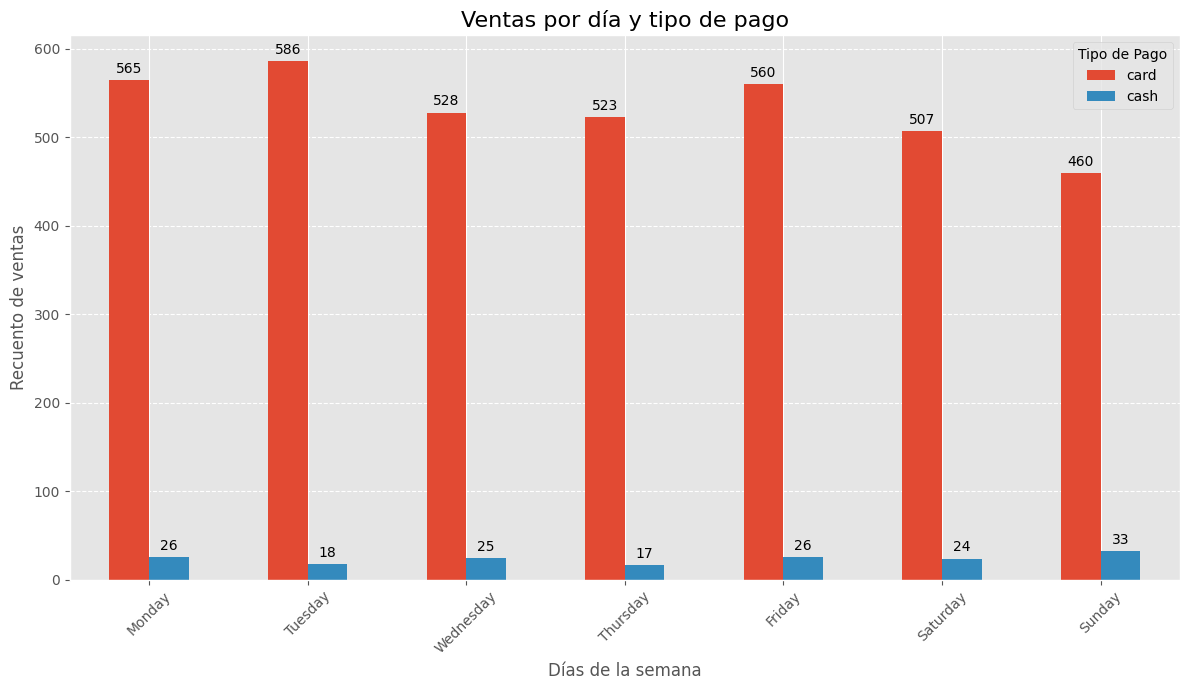

In [ ]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 7))

# Crear el gráfico de barras agrupado
df_pivoted.plot(kind='bar', ax=ax)

# Añadir los valores en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=3)

# Personalizar el gráfico
plt.title('Ventas por día y tipo de pago', fontsize=16)
plt.xlabel('Días de la semana', fontsize=12)
plt.ylabel('Recuento de ventas', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Pago')
plt.style.use('ggplot')
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Para asegurar que las etiquetas no se corten
plt.show()

## Resumen del Análisis
El análisis se realizó con datos de ventas de una máquina de café ubicada en un centro comercial en Vinnytsia, Ucrania. El objetivo era identificar patrones, evaluar el rendimiento de los productos y entender el comportamiento de los clientes para optimizar las operaciones y aumentar la rentabilidad.

##### Rendimiento temporal
El total de ingresos durante el período analizado fue de 122.322 UAH (Unidad Monetaria Ucraniana). En cuanto a la evolución de las ventas mensuales, el período de mayor venta fue en febrero de 2025, con un ingreso de 16.804 UAH y el día con mayores registros de ventas son los martes con una cantidad de 604 ventas.

##### Comportamiento del cliente
El método de pago más utilizado por los clientes es la tarjeta. El método de pago con tarjeta representa el 95.7% de las transacciones, mientras que el pago en efectivo solo el 4.3%. En promedio, las transacciones pagadas con tarjeta tienden a tener un valor un poco más alto y se mantienen dentro de un rango de precios mas estrecho en comparación con el pago en efectivo. También observamos que la mayor cantidad de ventas se produce durante las 10am.

##### Rendimiento de productos
El producto más popular, en términos de unidades vendidas, es el café Americano with milk, con un total de 868 ventas. Sin embargo, el Latte es el producto que genera la mayor cantidad de ingresos, demostrando que, a pesar de venderse con menos frecuencia que el Americano with Milk, su precio y volumen de venta lo convierten en un contribuyente más significativo a la rentabilidad del negocio.

##### **Conclusiones generales**
**Aumento de ingresos:** Se observa un aumento significativo en las ventas en los meses de octubre de 2024 y febrero y marzo de 2025.

**Preferencia por tarjeta:** Los clientes muestran una clara preferencia por los pagos con tarjeta.

**Producto estrella:** Aunque el Americano with Milk es el más popular por su volumen de ventas, el Latte es el que genera los mayores ingresos. Esta información es crucial para tomar decisiones sobre la gestión de inventario y las estrategias de precios.